## Clean data for outliers



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
from time import time
import matplotlib as pl
import matplotlib.pyplot as plt
import pickle

In [3]:
dataPath = '/Users/omojumiller/mycode/MachineLearningNanoDegree/IntroToMachineLearning/'
sys.path.append(dataPath+'tools/')
sys.path.append(dataPath+'final_project/')

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from helper_files import compareTwoFeatures, computeFraction

In [4]:
### Load the dictionary containing the dataset

with open(dataPath+'final_project/final_project_dataset.pkl', "r") as data_file:
    data_dict = pickle.load(data_file)

In [5]:
len(data_dict)

146

## Task: Data exploration
- If there are outliers, remove outliers

This is an iteratable process. I need to do this for each combination of features I want to use


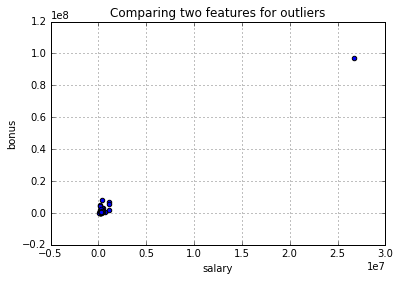

In [6]:
data = compareTwoFeatures('salary', 'bonus', data_dict)

1. I need to find out where that outlier is
2. Find out who it is

In [7]:
np.where(data > 0.8 * 1e8) # This is where the outlier is, what I have to do now is find out who it is


(array([57]), array([1]))

In [8]:
data[57] # So whose bonus is 97343619?
# What’s the name of the dictionary key of this data point?

array([ 26704229.,  97343619.])

In [9]:
for key, value in data_dict.iteritems():
    if (value['bonus'] >= int(data[57][1]) and 
        value['bonus'] != "NaN" and
        value['salary'] != "NaN"):
        print "{:20}{:12}${:<12,.2f}{:12}${:<12,.2f}".format(key, 'salary is ', value['salary'],
                                                   ' bonus ', value['bonus'])


TOTAL               salary is   $26,704,229.00 bonus      $97,343,619.00


Found the source of the outlier. It was the `TOTAL` row that was mistakenly read into the data dict

In [10]:
# Remove the source of the outlier
data_dict.pop( 'TOTAL')

# We can now go back and rerun the regression to see what the data really looks like.

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

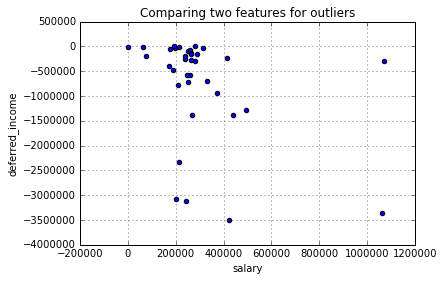

In [11]:
data = compareTwoFeatures('salary', 'deferred_income', data_dict)

## Task 6: Export data 
Dump  dataset to a .pkl file.

In [12]:
DATASET_PICKLE_FILENAME = "cleaned_dataset.pkl"

with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
    pickle.dump(data_dict, dataset_outfile)
   